In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('SOLD.csv',header=None,sep=';')

In [2]:
time=df[0]
veye = df[1]
vheadx= df[4]
vheady=df[5]
vheadz=df[6]
vheadw=df[3]



In [3]:
print(time)

0       1186382079
1       1186713161
2       1186878674
3       1187209750
4       1187375318
           ...    
4405    1919868635
4406    1920034197
4407    1920199711
4408    1920365273
4409    1920530792
Name: 0, Length: 4410, dtype: int64


In [4]:
vel=[]
for i in range (len(time)-1):
    vel.append((veye[i+1]-veye[i])/(time[i+1]-time[i])*1e7)

In [5]:
import matplotlib.pyplot as plt
from scipy import signal

In [6]:
dt=[]
dt.append(0)
for i in range (1,len(time)-1):
    dt.append(dt[len(dt)-1]+(time[i+1]-time[i])/1e7) 

4409
73.38176309999865


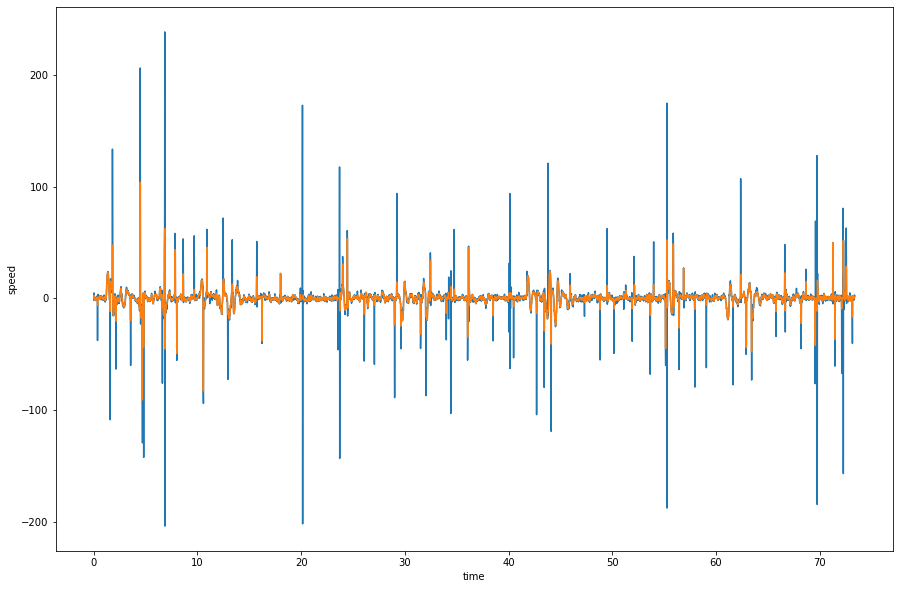

In [27]:
plt.figure(figsize=(15, 10))
plt.plot(dt,vel )
plt.plot(dt,signal.medfilt(vel))
plt.xlabel("time")
plt.ylabel("speed")
plt.show()

In [41]:
print(len(signal.medfilt(vel)))

4409


In [100]:
vel1=[i for i,t in zip(vel[:len(vel)-1],dt) if 10<t<20]



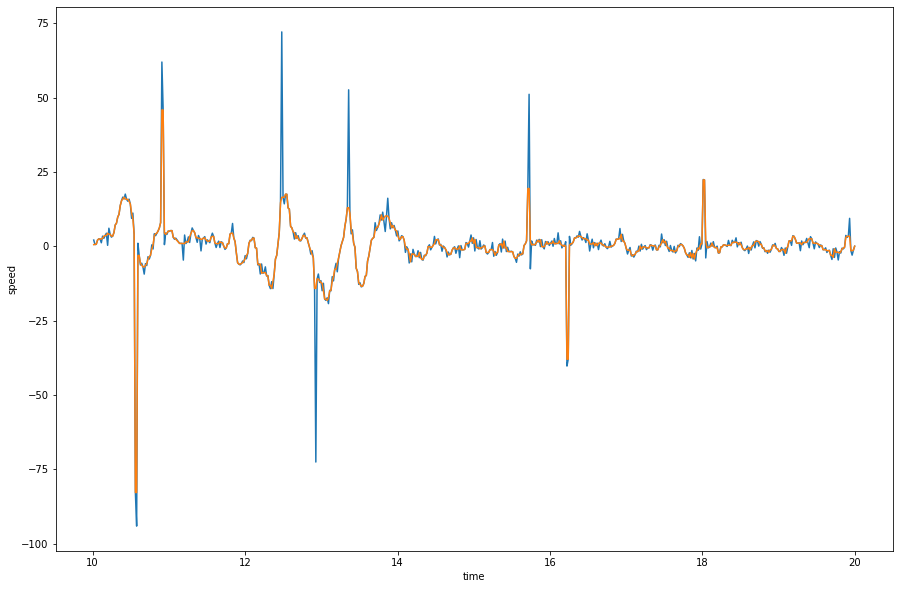

In [101]:
plt.figure(figsize=(15, 10))
plt.plot([t for t in dt if 10<t<20],vel1 )
plt.plot([t for t in dt if 10<t<20],signal.medfilt(vel1))
plt.xlabel("time")
plt.ylabel("speed")
plt.show()

In [8]:
from scipy.spatial.transform import Rotation as R

In [9]:
import math

In [10]:
r=[]
deg=[]
for i in range(len(vheadw)):
    r.append(R.from_quat([vheadw[i], vheadx[i], vheady[i], vheadz[i]]))
    deg.append(r[i].as_euler('xyz', degrees=True)[1])

In [50]:
deg=signal.medfilt(deg)

In [51]:
gradvel=[]
print(len(deg))
for i in range (len(deg)-1):
    gradvel.append((deg[i+1]-deg[i])/(time[i+1]-time[i])*1e7)

4410


In [52]:
print(degs)

[[-0.48026016 -0.52214292 -0.55597204 ... 65.61014669 65.61014669
  65.60870007]]


In [53]:

gvel=np.array(gradvel)
print(dt[6])

print(gradvel)


0.115874
[-1.2650266384409834, -1.7996070377701585, 0.0, 0.8396451274732281, 0.3434658555778107, 0.0, 1.4038618818282151, 1.7915867809023698, 1.4700413420637912, 0.0, 0.7128113045195834, 0.2010638189612531, 0.0, -0.17187536014734583, 0.0, -0.46612242734727766, -0.713730903815834, -1.0243515913813945, -1.416168692856974, -1.3064134267807324, 0.0, -0.7006075427197108, 0.0, 0.5455666175278413, 0.8186896792944254, 0.0, 0.0, 0.0, -0.570278874464507, -0.8501977128024191, -0.4678424600728094, 0.0, -0.8308684370931929, -0.12557652394840782, 0.0, 0.0, 0.3910738345833981, 0.0, 0.0, -0.39907203103712574, -0.10351522928801518, -1.0129020550469952, -1.4084390122558235, 0.0, -1.509579607215797, -1.6615172097379138, -1.6172105229944849, -0.7571001954295273, 0.0, 0.0, 0.8532989145320764, 0.05341136514589533, 0.20903213148300465, 0.7196204527211018, 0.0, 0.0, -0.20808723783620955, -1.3613155107603048, -1.9161534416847923, -1.6505847736359183, 0.0, -0.3989561669275629, 0.0, 1.3543661023213207, 2.1688514

In [54]:
from scipy import signal

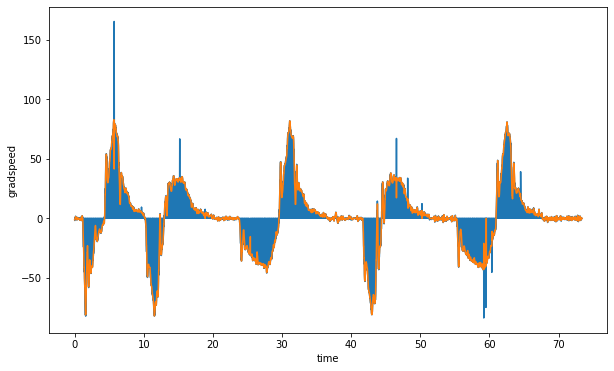

In [55]:

plt.figure(figsize=(10, 6))
plt.plot(dt,gradvel )
plt.plot(dt,signal.medfilt(gradvel))
plt.xlabel("time")
plt.ylabel("gradspeed")
plt.show()





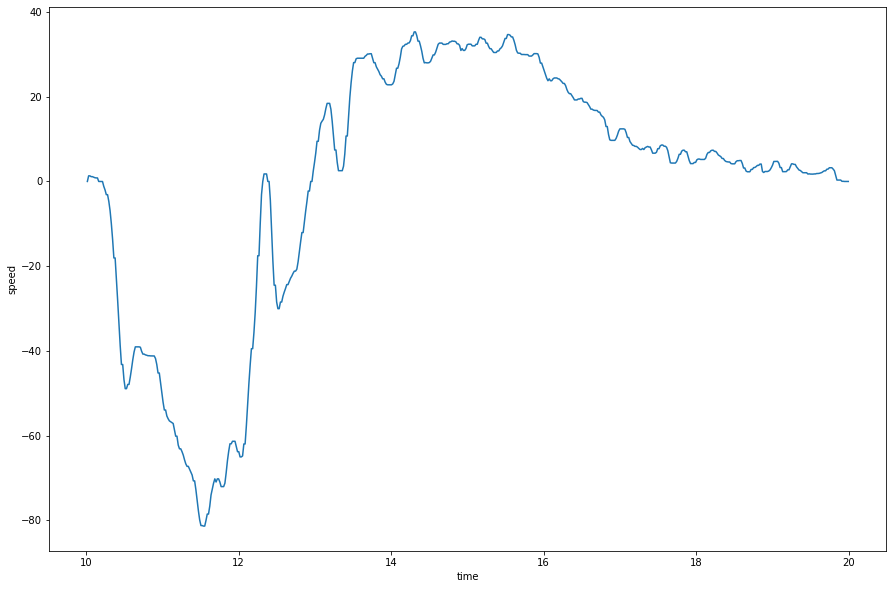

In [61]:
gradvel1=[i for i,t in zip(gradvel[:len(gradvel)-1],dt) if 10<t<20]
plt.figure(figsize=(15, 10))
plt.plot([t for t in dt if 10<t<20],signal.medfilt(gradvel1,kernel_size=5) )

plt.xlabel("time")
plt.ylabel("speed")
plt.show()

In [24]:
notsum=abs(np.array(signal.medfilt(gradvel1))-np.array(signal.medfilt(vel1)))
ddt=[]
ddt.append(0)
for i in range(len(notsum)):
    if notsum[i]>4:
        notsum[i]="NaN"
    else:
        ddt.append(ddt[len(ddt)-1]+(time[i+1]-time[i])/1e7) 
    
print(ddt[len(ddt)-1]/dt[len(dt)-1])




0.3198734618574542


In [95]:
notsum1=abs(np.array(signal.medfilt(gradvel1))-np.array(signal.medfilt(vel1)))
dt1=[t for t in dt if 10<t<20]


In [96]:
notsum1

array([5.22394722e-01, 1.14092338e+00, 6.55740235e-01, 7.50705865e-01,
       1.30110747e+00, 1.44066332e+00, 1.60298092e+00, 1.81912299e+00,
       2.55895626e+00, 2.76583295e+00, 3.59692959e+00, 4.38569149e+00,
       4.03225659e+00, 5.17164387e+00, 5.39804208e+00, 6.51493289e+00,
       9.28270536e+00, 1.18356837e+01, 1.46242222e+01, 1.97657161e+01,
       2.43905267e+01, 3.17206928e+01, 3.82850968e+01, 3.88817861e+01,
       4.45973107e+01, 4.92673406e+01, 5.44707731e+01, 5.89931109e+01,
       6.19183224e+01, 6.09552493e+01, 6.00756189e+01, 5.84006731e+01,
       5.30643971e+01, 3.48720358e+01, 3.66138967e+01, 4.11410097e+01,
       3.90068439e+01, 3.45662414e+01, 3.39742351e+01, 3.21046886e+01,
       3.16855883e+01, 3.21389453e+01, 3.32858846e+01, 3.58125347e+01,
       3.72364325e+01, 3.79256880e+01, 4.00230110e+01, 4.14854857e+01,
       4.46813347e+01, 4.53837577e+01, 4.55695333e+01, 4.63310760e+01,
       4.72201827e+01, 4.91333083e+01, 8.76256728e+01, 8.90241645e+01,
      

In [99]:
ddt1=[]
ddt1.append(0)
time1=0
for i in range(len(notsum1)-1):
    if notsum1[i]<8:
        ddt1.append(ddt1[len(ddt1)-1]+(dt1[i+1]-dt1[i]))
        time1+=(dt1[i+1]-dt1[i])

print(time1)        
print(time1/10)
      #dt1[len(dt1)-1])

2.8472134000000473
0.2847213400000047


In [25]:
print(ddt[len(ddt)-1])
print(dt[len(dt)-1])
print(len(ddt))

23.472878600000158
73.38176309999865
1413


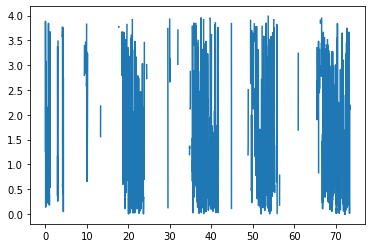

In [26]:
plt.plot(dt,notsum)

##### 